In [1]:
import sys
import numpy as np
import os
sys.path.append(os.path.expanduser("~/git/machine_learning/src"))
import importlib
import models
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import structure_predictor as sp

2023-11-08 15:30:26.262285: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-08 15:30:26.299113: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/anaconda/envs/tensorflow/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator KNeighborsClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persisten

In [2]:
data_dir = os.path.expanduser("~m2d/git/analysis_playground/ml/data/training_data")

pars = np.load(os.path.join(data_dir, "orhs2-pars_pars.npy"))
refl = np.load(os.path.join(data_dir, "orhs2-pars_data.npy"))
q_values = np.load(os.path.join(data_dir, "orhs_q_values.npy"))

print(pars.shape)
print(refl.shape)
print(q_values)

idx = 0
nset=1000000

(2000000, 7)
(2000000, 100)
[0.009      0.00926547 0.00953877 0.00982014 0.0101098  0.01040801
 0.01071501 0.01103107 0.01135645 0.01169143 0.01203629 0.01239133
 0.01275683 0.01313312 0.0135205  0.01391932 0.01432989 0.01475258
 0.01518773 0.01563572 0.01609693 0.01657174 0.01706055 0.01756378
 0.01808186 0.01861522 0.01916431 0.0197296  0.02031156 0.02091068
 0.02152748 0.02216248 0.0228162  0.02348921 0.02418206 0.02489536
 0.02562969 0.02638569 0.02716398 0.02796524 0.02879012 0.02963934
 0.03051361 0.03141366 0.03234027 0.0332942  0.03427628 0.03528732
 0.03632819 0.03739975 0.03850293 0.03963864 0.04080786 0.04201156
 0.04325077 0.04452653 0.04583993 0.04719206 0.04858408 0.05001715
 0.0514925  0.05301137 0.05457504 0.05618483 0.05784211 0.05954827
 0.06130475 0.06311305 0.06497469 0.06689124 0.06886432 0.0708956
 0.0729868  0.07513968 0.07735606 0.07963782 0.08198689 0.08440524
 0.08689493 0.08945806 0.09209679 0.09481336 0.09761006 0.10048924
 0.10345336 0.10650491 0.10964647 0

In [4]:
print(refl[1].shape)

(100,)


In [3]:
importlib.reload(sp)
idx+=1
predictor = sp.StructurePredictor(os.path.expanduser("~vogtdan000/git/machine_learning/src/settings.json"),2)
test_pars=[]
test_refl=[]

for i in range (100):
    if pars[i][5]>1:
        test_pars.append(pars[i])
        test_refl.append(refl[i])
test_refl=np.asarray([test_refl])
test_pars=np.asarray([test_pars])
predicted_layers, predicted_pars = predictor.predict([refl[100:125]])

real_parameters = predictor.rescale_real_pars(pars[100:125],2)

for i in range (len(predicted_pars)):
    if real_parameters[i][4]>1:
        print ("Predicted: %s" %predicted_pars[i])
        print ("Real: %s" %real_parameters[i])
        print("")

1/1 [==============================] - 0s 17ms/step
Predicted: [11.763956904411316, -0.4741840362548828, 774.3673792481422, 46.47868812084198, 4.13418185710907, 886.1246943473816, 44.98533695936203]
Real: [9.14537505082082, -0.6485389560478412, 806.9588221429703, 44.374603280317395, 3.858002201321245, 856.156685841003, 45.19547520786289]

Predicted: [23.244427412748337, 5.550762414932251, 556.5508735179901, 23.763082027435303]
Real: [27.184773797857453, 1.069062803191163, 676.2576595740911, 27.500352519230145, 5.398474508977148, 540.3624360709196, 20.132991846172857]

Predicted: [12.810638308525085, 5.831387042999268, 822.8962132334709, 48.191986083984375, 5.722009181976318, 727.540722489357, 45.14626204967499]
Real: [11.897375693004964, 5.646799015642043, 754.8373738336196, 59.248633384735825, 6.109701718918273, 788.5187715823577, 45.27523630427389]

Predicted: [17.227548744529486, 0.5296409130096436, 94.23094362020493, 47.50987470149994, 6.2024312019348145, 437.61828914284706, 36.392

1/1 [==============================] - 0s 126ms/step
*0 10.335  4.024   651.824  40.120   [207.917]
 1 12.408  3.870   563.893  35.916  1.690   761.736  41.615   [31.6025]
 2 11.888  4.118   492.374  37.570  2.328   548.895  41.279  0.726   377.317  41.866   [198.46]
 3 11.639  4.230   361.694  45.380  3.345   194.350  35.917  1.972   340.083  44.956  1.785   354.835  41.362   [15.6578]

11.213  3.927   555.131  33.757  1.819   697.437  42.590 


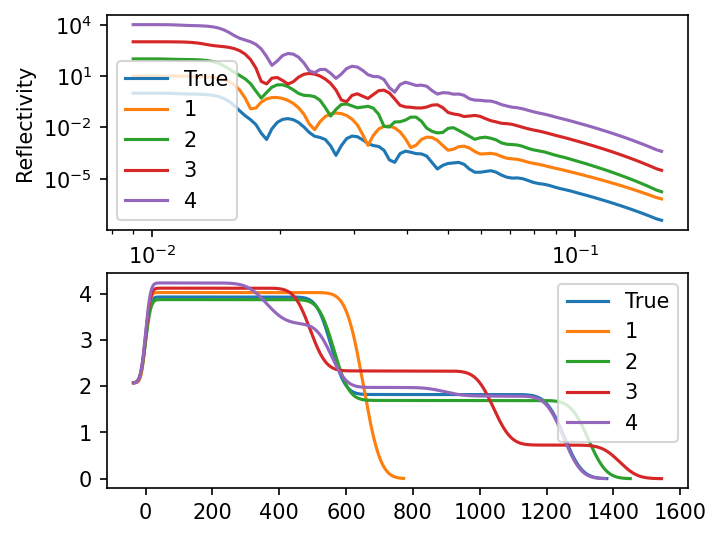

In [4]:
importlib.reload(sp)
idx+=1
predictor = sp.StructurePredictor(os.path.expanduser("~vogtdan000/git/machine_learning/src/settings.json"),2)
number_of_layers, predicted_pars = predictor.big_predict([[refl[idx]]])

#print(predicted_pars)
real_parameters = predictor.rescale_real_pars([pars[idx]],2) 
#print(real_parameters)
fig, ax = plt.subplots(2, 1, dpi=150, figsize=(5, 4.1))
q, r_real, z, sld = sp.calculate_reflectivity(q_values, real_parameters[0])

plt.subplot(2,1,1)
plt.plot(q_values, r_real, label='True')
plt.subplot(2,1,2)
plt.plot(z, sld, label='True')
for i in range(len(predicted_pars[0])):
    label = '*' if i == number_of_layers[0]-1 else ' '
    par_str = ' '.join(['%-6.3f ' % p for p in predicted_pars[0][i]])
    q, r, z, sld = sp.calculate_reflectivity(q_values, predicted_pars[0][i])
    chi2=np.mean((r_real-r)**2/(0.1*r)**2)
    print('%s%s %s  [%g]' % (label, i, par_str, chi2))
    plt.subplot(2,1,1)
    plt.plot(q_values, r*10**(i+1), label= str(i+1))
    plt.subplot(2,1,2)
    plt.plot(z, sld, label=str(i+1))

print()

plt.subplot(2,1,1)
plt.xlabel('Q ($1/\AA$)', fontsize=10)
plt.ylabel('Reflectivity', fontsize=10)
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.subplot(2,1,2)
plt.legend()
print(' '.join(['%-6.3f ' % p for p in real_parameters[0]]))

